<a href="https://colab.research.google.com/github/Jake-Baum/ml-mono/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Imports { display-mode: "both" }

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

import time

In [3]:
#@title Load dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


'frog'

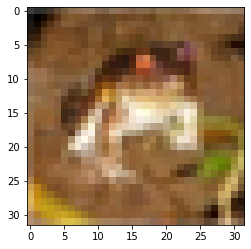

In [ ]:
#@title Visualise data


plt.imshow(x_train[0])
label_names[y_train[0][0]]

In [4]:
#@title Normalise data

x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [5]:
#@title Define plotting function for classification metrics

def plot_curve(epochs, hist, metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for metric in metrics:
    x = hist[metric]
    plt.plot(epochs[1:], x[1:], label=metric)
  
  plt.legend()

print("plot_curve defined")

plot_curve defined


In [ ]:
#@title Define function for creating a model

def create_model(learning_rate):
  model = tf.keras.models.Sequential()

  #Flatten image array to 1D
  model.add(tf.keras.layers.Flatten(input_shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0]))))
  print('First layer contains', len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0]), 'nodes')

  model.add(tf.keras.layers.Dense(units=500, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=200, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=100, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=50, activation='relu'))

  #Ouput layer
  model.add(tf.keras.layers.Dense(units=len(label_names), activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [ ]:
#@title Define method for creating a convolutional model

def create_convolutional_model(learning_rate):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0]))),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.4),

    #Create one dimension tensor so we can add fully connected layers after
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    #Ouput layer
    tf.keras.layers.Dense(units=len(label_names), activation='softmax')
  ])

  print('First layer contains', len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0]), 'nodes')

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [41]:
#@title Define method for creating a convolutional model using functional API

def create_convolutional_model_functional(learning_rate):
  input = tf.keras.layers.Input(shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0])))

  augmentation = tf.keras.layers.RandomFlip("horizontal")(input)
  augmentation = tf.keras.layers.RandomRotation(factor=0.01, fill_mode="nearest")(augmentation)

  x = tf.keras.layers.Conv2D(32, 5, activation='relu')(augmentation)
  x = tf.keras.layers.MaxPooling2D(2, strides=1)(x)

  x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2, strides=1)(x)

  x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)

  x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  #Create one dimension tensor so we can add fully connected layers after
  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)

    #Ouput layer
  output = tf.keras.layers.Dense(units=len(label_names), activation='softmax')(x)

  model = tf.keras.Model(input, output)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  model.summary()
  
  return model

In [42]:
#@title Define function for training a model

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.2):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 random_flip_16 (RandomFlip)  (None, 32, 32, 3)        0         
                                                                 
 random_rotation_9 (RandomRo  (None, 32, 32, 3)        0         
 tation)                                                         
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 25, 25, 64)        1849

[0.7305923700332642, 0.8019000291824341]

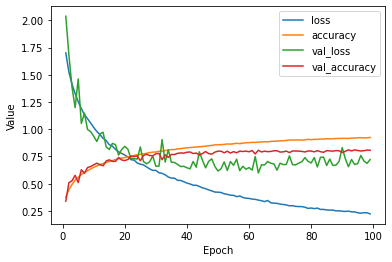

In [43]:
#@title Train model

learning_rate = 0.0002
epochs = 100
batch_size = 250
validation_split = 0.2

#model = create_model(learning_rate)
model = create_convolutional_model_functional(learning_rate)

start_time = time.time()
epochs, hist = train_model(model, x_train_normalized, y_train, epochs, batch_size, validation_split)
print('Time to train model:', time.time() - start_time)

metrics=['loss', 'accuracy', 'val_loss', 'val_accuracy']
plot_curve(epochs, hist, metrics)

model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)